In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading Data

In [48]:
data = pd.read_csv('data.csv')

data.describe()

,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


## Standarize Data

In [53]:


new_data = pd.DataFrame({
	'km': (data['km'] - data['km'].mean()) / data['km'].std(),
	'price': (data['price'] - data['price'].mean()) / data['price'].std()
})

new_data.describe()

,km,price
count,2.400000e+01,2.400000e+01
mean,1.850372e-17,2.220446e-16
std,1.000000e+00,1.000000e+00
min,-1.483975e+00,-2.032224e+00
25%,-6.843145e-01,-4.882592e-01
50%,-3.427054e-01,1.236435e-01
75%,7.576520e-01,5.934636e-01
max,2.637603e+00,1.483848e+00


## Distrubation histogram

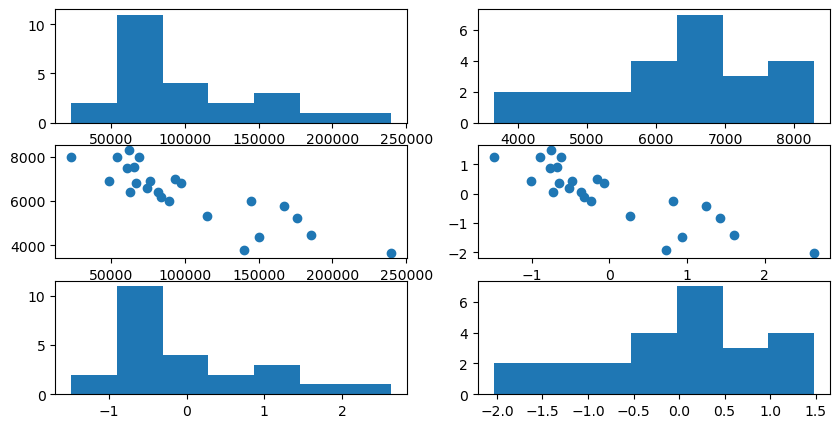

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(10, 5))

axs[0, 0].hist(data['km'], bins=7)
axs[0, 1].hist(data['price'], bins=7)
axs[1, 0].scatter(x=data['km'], y=data['price'])
axs[1, 1].scatter(x=new_data['km'], y=new_data['price'])
axs[2, 0].hist(new_data['km'], bins=7)
axs[2, 1].hist(new_data['price'], bins=7)



plt.show()

## Snagat Poc for simple linear regression using Gradient Descent

## Linear Regression without vectorizing

In [57]:
def linear_regression(x, y):
    a = b = 0
    alpha = 0.01
    for _ in range(1000):
        ypred = a * x + b
        der_a = np.sum((ypred - y) * x)
        der_b = np.sum(ypred - y)
        a -= alpha * der_a / len(y)
        b -= alpha * der_b / len(y)
    return a, b

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
a , b = linear_regression(x, y)

print(2 * a + b)

6.813388860197202


## Linear Regression vectorized

In [61]:
def linear_regression_vectorize(theta,X, y):
    alpha = 0.1
    m = len(y)
    for _ in range(1000):
        ypred = X.dot(theta)
        grad = 1/m * X.T.dot(ypred - y)
        theta = theta - alpha * grad
    return theta

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
# a , b = linear_regression_vectorize(x,y)
X = np.vstack((np.ones(len(x)), x)).T


theta = np.zeros(2)
theta.reshape(1,2)

thetas = linear_regression_vectorize(theta, X, y)

result = 4 * thetas[1] + thetas[0]
print(result)


11.000000009662648


## Now we working on real project aka ft_linear_regression

In [98]:
%matplotlib inline

Fitted coefficients (custom): (2.3666254141592853e-16, -0.8561024601837492)
thetas: 8499.506064757234, -0.02144803761318838


/var/folders/dn/20_wz9v90k523gyfbn33x50m0000gn/T/ipykernel_53428/1667899706.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.x1, self.y1, cmap='winter', label='Data points')


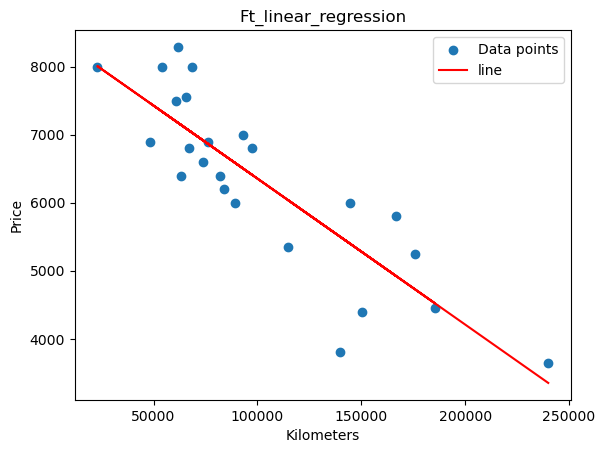

Mean Squared Error (custom): 445645.2473511696
R-squared (custom): 0.7329747064654101
Model Accuracy (custom): 73.297470646541%
8421.220727469095


In [45]:

class LinearRegression1337:
	def __init__(self):
		self.theta = np.zeros(2)
		self.iterations = 1000
		self.data = pd.read_csv('data.csv')
		self.alpha = 0.01  # learning rate
		self.m = len(self.data)
		self.x1 = np.array(self.data['km'])
		self.y1 = np.array(self.data['price'])

		self.mean_x1 = np.mean(self.x1)
		self.std_x1 = np.std(self.x1)
		self.mean_y1 = np.mean(self.y1)
		self.std_y1 = np.std(self.y1)

		self.x = (self.x1 - self.mean_x1) / self.std_x1
		self.y = (self.y1 - self.mean_y1) / self.std_y1
		self.X = np.vstack((np.ones(self.m), self.x)).T

	def gradient_descent(self):
		for _ in range(self.iterations):
			y_pred = self.X.dot(self.theta)
			grad = 1/self.m * self.X.T.dot(y_pred - self.y)
			self.theta -= self.alpha * grad
		return self.theta

	def fit(self):
		self.theta = self.gradient_descent()
		return self.theta

	def predict(self, x):
		x_standardized = (x - self.mean_x1) / self.std_x1
		X_pred = np.vstack((np.ones(len(x_standardized)), x_standardized)).T
		y_pred_standardized = X_pred.dot(self.theta)
		return y_pred_standardized * self.std_y1 + self.mean_y1

	def plot_fit(self):
		fig, ax = plt.subplots()
		ax.scatter(self.x1, self.y1, cmap='winter', label='Data points')
		ax.plot(self.x1, self.predict(self.x1),color='red', label='line')
		ax.set(ylabel='Price', xlabel='Kilometers', title="Ft_linear_regression")
		ax.legend()
		plt.show()

	def mse(self):
		y_pred = self.predict(self.x1)
		mse_value = np.mean((self.y1 - y_pred) ** 2)
		return mse_value

	def r_squared(self):
		y_pred = self.predict(self.x1)
		ss_total = np.sum((self.y1 - np.mean(self.y1)) ** 2)
		ss_residual = np.sum((self.y1 - y_pred) ** 2)
		r2 = 1 - (ss_residual / ss_total)
		return r2

	def model_accuracy(self):
		r2 = self.r_squared()
		return r2 * 100

	def print_metrics(self):
		mse_value = self.mse()
		r2_value = self.r_squared()
		accuracy = self.model_accuracy()
		print(f"Mean Squared Error (custom): {mse_value}")
		print(f"R-squared (custom): {r2_value}")
		print(f"Model Accuracy (custom): {accuracy}%")
	def get_thatas(self):
		theta1_original = self.theta[1] * (self.std_y1 / self.std_x1)
		theta0_original = self.mean_y1 + self.std_y1 * self.theta[0] - theta1_original * self.mean_x1
		return theta0_original , theta1_original 


# Example usage:
model = LinearRegression1337()
theta = model.fit()
thetas = model.get_thatas()
print(f"Fitted coefficients (custom): {theta[0], theta[1]}")
print(f"thetas: {thetas[0]}, {thetas[1]}")
model.plot_fit()

# Predicting after standardization
predictions = model.predict(np.array(model.data['km']))
pd.DataFrame(predictions, model.data['price']).to_csv("predicted.csv")

# Calculate and print MSE, R-squared, and model accuracy
model.print_metrics()
print(3650 * thetas[1] + thetas[0])

In [43]:
print(240000 * thetas[1] + thetas[0])

3351.9770375920216
